In [1]:
%%time
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , precision_recall_curve , f1_score
from sklearn.metrics import classification_report , roc_auc_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from joblib import dump, load

Wall time: 27.3 s


In [2]:
%%time
# Read csv file into dataframe
df = pd.read_csv('paysim.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
Wall time: 10.2 s


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00"
mean,243.40,"179,861.90","833,883.10","855,113.67","1,100,701.67","1,224,996.40",0.00,0.00
std,142.33,"603,858.23","2,888,242.67","2,924,048.50","3,399,180.11","3,674,128.94",0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,"13,389.57",0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,"74,871.94","14,208.00",0.00,"132,705.66","214,661.44",0.00,0.00
75%,335.00,"208,721.48","107,315.18","144,258.41","943,036.71","1,111,909.25",0.00,0.00
max,743.00,"92,445,516.64","59,585,040.37","49,585,040.37","356,015,889.35","356,179,278.92",1.00,1.00


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [5]:
# Convert "type" into categorical variables, e.g. values 0,1 for each type as its own column
df['type'] = df['type'].astype('category')
df = pd.get_dummies(df , columns= ['type'])

In [6]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0,0,1,0,0,0
4,1,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0,0,0,0,1,0


In [7]:
# Define X with selected columns, y as the binary variable to predict
X = df.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1 ).values
y = df['isFraud'].values

In [8]:
# Train, Test, Split to segregate Training from Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
%%time
#lr = LogisticRegression(solver='lbfgs', max_iter=1000)
rc = RandomForestClassifier()

rc.fit(X_train, y_train)

rc_predict = rc.predict(X_test)

print (confusion_matrix(y_test , rc_predict))
print ("Accuracy score: ", accuracy_score(y_test , rc_predict))
print("F1 score: ", f1_score(y_test , rc_predict))
print("Precision score: " , precision_score(y_test , rc_predict))
print("Recall score: " , recall_score(y_test , rc_predict))
print (classification_report(y_test , rc_predict))
rc

C:\Users\19145\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[1906298      53]
 [    526    1909]]
Accuracy score:  0.9996966658389154
F1 score:  0.8683193086195133
Precision score:  0.972986748216106
Recall score:  0.7839835728952772
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 2min 18s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
%%time
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('rc', RandomForestClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Fit the pipeline to the training set: knn_scaled

rc_scaled = pipeline.fit(X_train, y_train)

rc_predict_scaled = rc_scaled.predict(X_test)

# Instantiate and fit a k-NN classifier to the unscaled data

# Compute and print metrics
print (confusion_matrix(y_test , rc_predict_scaled))
print ("Accuracy score: ", accuracy_score(y_test , rc_predict_scaled))
print("F1 score: ", f1_score(y_test , rc_predict_scaled))
print("Precision score: " , precision_score(y_test , rc_predict_scaled))
print("Recall score: " , recall_score(y_test , rc_predict_scaled))
print (classification_report(y_test , rc_predict_scaled))
rc_scaled

C:\Users\19145\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[1906303      48]
 [    550    1885]]
Accuracy score:  0.9996867118681717
F1 score:  0.8630952380952381
Precision score:  0.975168132436627
Recall score:  0.7741273100616016
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.77      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 2min 28s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rc',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [11]:
%%time
# Set max_iter=1000 and compare to default(100) no convergange result: Similar result 
steps = [('scaler', StandardScaler()),
        ('rc2', RandomForestClassifier(n_estimators=100))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Fit the pipeline to the training set: knn_scaled

rc_scaled2 = pipeline.fit(X_train, y_train)

rc_predict_scaled2 = rc_scaled2.predict(X_test)

# Instantiate and fit a k-NN classifier to the unscaled data

# Compute and print metrics
print (confusion_matrix(y_test , rc_predict_scaled2))
print ("Accuracy score: ", accuracy_score(y_test , rc_predict_scaled2))
print("F1 score: ", f1_score(y_test , rc_predict_scaled2))
print("Precision score: " , precision_score(y_test , rc_predict_scaled2))
print("Recall score: " , recall_score(y_test , rc_predict_scaled2))
print (classification_report(y_test , rc_predict_scaled2))
rc_scaled2

[[1906306      45]
 [    523    1912]]
Accuracy score:  0.9997024286640829
F1 score:  0.8706739526411658
Precision score:  0.977005620848237
Recall score:  0.7852156057494867
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.79      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 22min 17s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rc2',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [12]:
%%time
# Set max_iter=1000 and compare to default(100) no convergange result: Similar result 
steps = [('scaler', StandardScaler()),
        ('rc2', RandomForestClassifier(n_estimators=100))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Fit the pipeline to the training set: knn_scaled

rc_train_scaled2 = pipeline.fit(X_train, y_train)

rc_predict_train_scaled2 = rc_train_scaled2.predict(X_train)

# Instantiate and fit a k-NN classifier to the unscaled data

# Compute and print metrics
print (confusion_matrix(y_train , rc_predict_train_scaled2))
print ("Accuracy score: ", accuracy_score(y_train , rc_predict_train_scaled2))
print("F1 score: ", f1_score(y_train , rc_predict_train_scaled2))
print("Precision score: " , precision_score(y_train , rc_predict_train_scaled2))
print("Recall score: " , recall_score(y_train , rc_predict_train_scaled2))
print (classification_report(y_train , rc_predict_train_scaled2))
rc_train_scaled2

[[4448056       0]
 [      0    5778]]
Accuracy score:  1.0
F1 score:  1.0
Precision score:  1.0
Recall score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448056
           1       1.00      1.00      1.00      5778

    accuracy                           1.00   4453834
   macro avg       1.00      1.00      1.00   4453834
weighted avg       1.00      1.00      1.00   4453834

Wall time: 22min 31s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rc2',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [19]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rc2', RandomForestClassifier(n_estimators=100))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rc2__max_depth': [1, 10, 20, 30, 50, None],
                'rc2__class_weight': [None, 'balanced'],
                 'rc2__criterion' : ['gini', 'entropy']}

# Instantiate the logistic regression classifier: logreg
#logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

# Instantiate the GridSearchCV object: logreg_cv
rc_cv = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rc_cv.fit(X_train, y_train)

rc_cv_predict = rc_cv.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rc_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rc_cv.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rc_cv_predict))
print ("Accuracy score: ", accuracy_score(y_test , rc_cv_predict))
print("F1 score: ", f1_score(y_test , rc_cv_predict))
print("Precision score: " , precision_score(y_test , rc_cv_predict))
print("Recall score: " , recall_score(y_test , rc_cv_predict))
print (classification_report(y_test , rc_cv_predict))
rc_cv

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 178.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 448.3min finished


Tuned Logistic Regression Parameter: {'rc2__class_weight': None, 'rc2__criterion': 'entropy', 'rc2__max_depth': 50}
Tuned Logistic Regression Accuracy: 0.9997054223394944
[[1906310      41]
 [    514    1921]]
Accuracy score:  0.9997092392756443
F1 score:  0.8737775756197408
Precision score:  0.9791029561671764
Recall score:  0.788911704312115
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.79      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 7h 45min 15s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rc2',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

In [40]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rc3', RandomForestClassifier(n_estimators=100))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rc3__max_depth': [100, 200, 500, 2000, 5000, 10000, None]}

# Instantiate the logistic regression classifier: logreg
#logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

# Instantiate the GridSearchCV object: logreg_cv
rc_cv3 = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rc_cv3.fit(X_train, y_train)

rc_cv3_predict = rc_cv3.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rc_cv3.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rc_cv3.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rc_cv3_predict))
print ("Accuracy score: ", accuracy_score(y_test , rc_cv3_predict))
print("F1 score: ", f1_score(y_test , rc_cv3_predict))
print("Precision score: " , precision_score(y_test , rc_cv3_predict))
print("Recall score: " , recall_score(y_test , rc_cv3_predict))
print (classification_report(y_test , rc_cv3_predict))
rc_cv3

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 207.8min finished


Tuned Logistic Regression Parameter: {'rc3__max_depth': 200}
Tuned Logistic Regression Accuracy: 0.9996975639415389
[[1906312      39]
 [    537    1898]]
Accuracy score:  0.9996982375185065
F1 score:  0.868252516010979
Precision score:  0.9798657718120806
Recall score:  0.7794661190965092
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 3h 51min 19s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rc3',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

In [9]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rc4', RandomForestClassifier(n_estimators=100))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rc4__max_depth': [10, 20, 30, 100, 200, None]}

# Instantiate the logistic regression classifier: logreg
#logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

# Instantiate the GridSearchCV object: logreg_cv
rc_cv4 = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rc_cv4.fit(X_train, y_train)

rc_cv4_predict = rc_cv4.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rc_cv4.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rc_cv4.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rc_cv4_predict))
print ("Accuracy score: ", accuracy_score(y_test , rc_cv4_predict))
print("F1 score: ", f1_score(y_test , rc_cv4_predict))
print("Precision score: " , precision_score(y_test , rc_cv4_predict))
print("Recall score: " , recall_score(y_test , rc_cv4_predict))
print (classification_report(y_test , rc_cv4_predict))
rc_cv4

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 161.2min finished


Tuned Logistic Regression Parameter: {'rc4__max_depth': 30}
Tuned Logistic Regression Accuracy: 0.9997002582494093
[[1906305      46]
 [    540    1895]]
Accuracy score:  0.9996929985865362
F1 score:  0.8660877513711152
Precision score:  0.9763008758371973
Recall score:  0.7782340862422998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.78      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 3h 3min 35s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rc4',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

In [12]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rc5', RandomForestClassifier(n_estimators=100))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'rc5__max_depth': [20, 30, 100, 200, 500, None],
                'rc5__class_weight': [None, 'balanced'],
                 'rc5__criterion' : ['gini', 'entropy']}

# Instantiate the logistic regression classifier: logreg
#logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

# Instantiate the GridSearchCV object: logreg_cv
rc_cv5 = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rc_cv5.fit(X_train, y_train)

rc_cv5_predict = rc_cv5.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(rc_cv5.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(rc_cv5.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rc_cv5_predict))
print ("Accuracy score: ", accuracy_score(y_test , rc_cv5_predict))
print("F1 score: ", f1_score(y_test , rc_cv5_predict))
print("Precision score: " , precision_score(y_test , rc_cv5_predict))
print("Recall score: " , recall_score(y_test , rc_cv5_predict))
print (classification_report(y_test , rc_cv5_predict))
rc_cv5

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 228.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 525.3min finished


Tuned Logistic Regression Parameter: {'rc5__class_weight': None, 'rc5__criterion': 'entropy', 'rc5__max_depth': 30}
Tuned Logistic Regression Accuracy: 0.9997049732881828
[[1906308      43]
 [    504    1931]]
Accuracy score:  0.9997134304212206
F1 score:  0.8759355863007484
Precision score:  0.9782168186423505
Recall score:  0.7930184804928131
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.79      0.88      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.90      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

Wall time: 9h 2min 39s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rc5',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

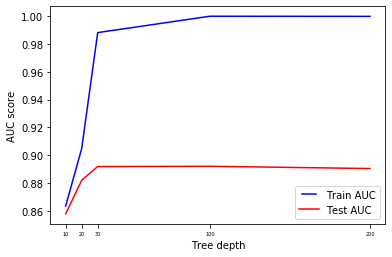

Wall time: 36min 33s


In [11]:
%%time
max_depths = [10, 20, 30, 100, 200]
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators=100)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=10)
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.xticks([10, 20, 30, 100, 200], fontsize=5)
plt.show()

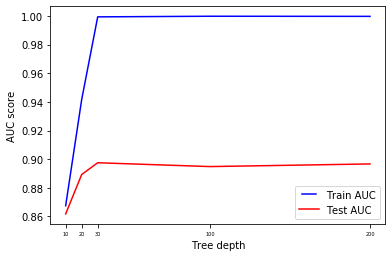

Wall time: 29min 21s


In [13]:
%%time
max_depths = [10, 20, 30, 100, 200]
train_results = []
test_results = []
for max_depth in max_depths:
   rf2 = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators=100, criterion='entropy')
   rf2.fit(X_train, y_train)
   train_pred = rf2.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf2.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=10)
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.xticks([10, 20, 30, 100, 200], fontsize=5)
plt.show()

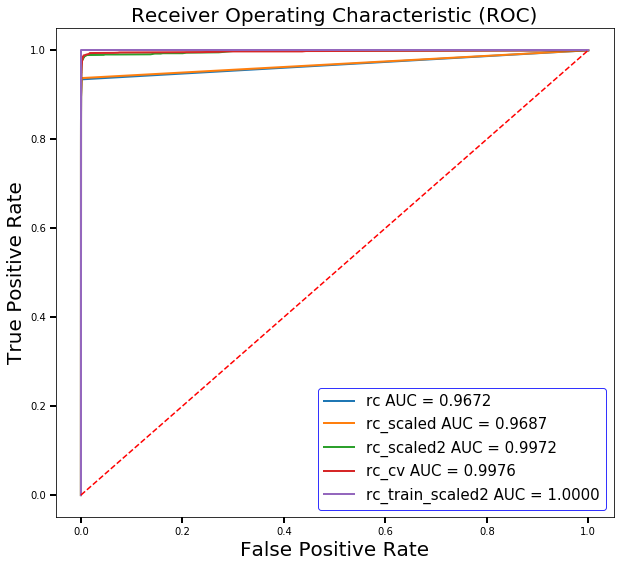

Wall time: 1min 40s
Parser   : 330 ms


In [21]:
%%time
#Plotting the ROC AUC curve for the Test models(w/wo scaling and max_iter), and TRAIN result for best pipeline 
# Since Train and Test results are similar, the model does well as to not over/under fitting
# The scaling improves the shape and coverage of the curve, while max_iter is a warning that does not change result
plt.rcParams.update({'font.size': 30})
model_list = [rc, 
              rc_scaled, 
              rc_scaled2,
              rc_cv
             ]

model_name = ['rc','rc_scaled', 'rc_scaled2', 'rc_cv']
 
# Plot ROC curve for all my models
fig, ax = plt.subplots(figsize=(10,9))
for i, model in enumerate(model_list):
    y_pred = list(model.predict_proba(X_test)[:,1])
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
y_pred = list(rc_train_scaled2.predict_proba(X_train)[:,1])
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = ('rc_train_scaled2' + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    
ax.grid(False)
ax.tick_params(length=6, width=2,labelsize = 10,
               grid_color='r', grid_alpha=0.5)
# plt.legend(loc = 'lower right',prop={'size': 25})
leg = plt.legend(loc = 'lower right',prop={'size': 15})
leg.get_frame().set_edgecolor('b')
plt.title('Receiver Operating Characteristic (ROC)', FontSize=20)
plt.plot([0, 1], [0, 1], 'r--')
#plt.xlim([-.02, 1.02])
#plt.ylim([-.02, 1.02])
plt.ylabel('True Positive Rate',FontSize=20)
plt.xlabel('False Positive Rate',FontSize=20)
plt.show()

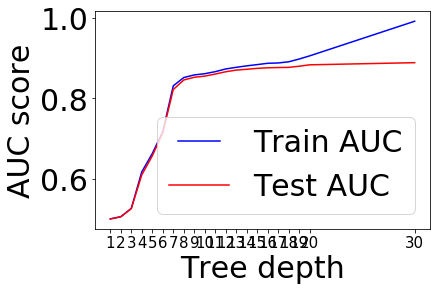

In [44]:
%%time
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30]
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators=100)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_train, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=10)
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30], fontsize=5)
plt.show()

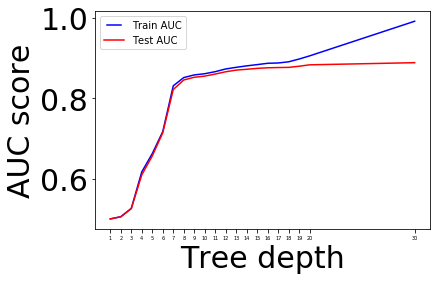

In [45]:
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=10)
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30], fontsize=5)
plt.show()

In [10]:
test_results, train_results

NameError: name 'test_results' is not defined

In [33]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [35]:
test_results

[0.5,
 0.8642663261665895,
 0.8897233551443963,
 0.8962920987840303,
 0.8952656670200411,
 0.8975236070758691,
 0.8952651424576703,
 0.8973193173915753,
 0.8969083774923204,
 0.8977299950096453,
 0.8967025141209147,
 0.8960875468185514]

In [38]:
dump(rc_cv2, 'Models/rc_cv2.sav')

['Models/rc_cv2.sav']

In [41]:
dump(rc_cv3, 'Models/rc_cv3.sav')

['Models/rc_cv3.sav']